steps of a genetic algorithm:

initialization
evaluation
elitism
parent selection
reproduction
mutation

candlestick based genalg params:
modify these based off of largely expanded featurespace

popsize - 200
num gens - 9
elitism copys - 1
mutation prob - 5%
fresh pattern prob - 2%
min number of patterns - 2.5%

In [ ]:
import _09_utility as util

dataset = util.load_large_csv('spx_features.csv')


In [ ]:
fssr = util.fn_all_subsets(True,0,True)
fssd = util.fnsubset_to_indexdictlist(dataset.columns,fssr)
fss = []
for d in fssd:
    fss.append(list(d.keys()))
print(fss)

In [ ]:
dataset = dataset.values
arr_low = dataset[:,1]
arr_close = dataset[:,2]

arr_low.shape

(347258,)

In [43]:
#example for initiation and evaluation steps

from importlib import reload
import _00_gene as _0
reload(_0)
import _01_initialization as _1
reload(_1)
import _02_evaluation as _2
reload(_2)
import _03_elitism as _3
reload(_3)
import _04_parentselection as _4
reload(_4)
import _05_reproduction as _5
reload(_5)
import _06_mutation as _6
import _09_utility as util


#dataset = util.load_large_csv('spx_features.csv')
#dataset, fss = util.drop_all_targets()

log_normalize = True
lag_allowance = 30
generations = 10
hold_for = 30

#kelsch_ratio
#average_return
#profit_factor

criteria = 'total_kelsch_ratio'

new_population = _1.generate_initial_population(
    sample_size=200,
    pattern_size=2,
    feat_idx_pool=fss,
    lag_allowance=lag_allowance,
    skew_lag_prob=False
)

print("collecting returns and kratio... ",end='')
arr_returns, arr_kratio = _1.collect_parallel_metrics(
	arr_close=arr_close,
	arr_low=arr_low,
	hold_for=hold_for,
	lag_allow=lag_allowance,
	log_normalize=log_normalize
)
print("complete.")

#begin generational loop
for generation in range(generations):

	population = new_population

	print(f"Generation {generation+1} ({criteria}): ",end='')

	returns, kelsch_ratio = _2.fitness(
		arr_close=arr_close,
		arr_low=arr_low,
		arr_returns=arr_returns,
		arr_kratio=arr_kratio,
		data=dataset,
		genes= population,
		hold_for=hold_for,
		lag_allow=lag_allowance,
		specific_data=None,#'form_519',
		log_normalize=log_normalize
	)
	unsorted_population = _2.associate(
		genes=population,
		returns=returns,
		kelsch_ratio=kelsch_ratio,
		log_normalize=log_normalize
	)
	'''unsorted_population = _2.filter_population(
		population=unsorted_population,
		avg_return=1.00 / 25000,
		tot_return=0.25,
		profit_factor=0.5,
		kelsch_ratio=2.0,
		entry_frequency=0.01
	)'''

	population = _2.sort_population(
		population=unsorted_population,
		criteria=criteria
	)

	avg, top = _2.simple_generational_stat_output(population,criteria)
	print(f"AVG {avg}, BEST {top}, FROM {len(population)} GENES.")

	elites = _3.collect_elite(
		sorted_population=population,
		filter_criteria=1
	)
	parents = _4.collect_parents(
		sorted_population=population,
		criteria=criteria,
		num_parents=15
	)
	family = _5.reproduce(
		parents=parents,
		mode='exponential'
	)
	shuffled_family = _1.shuffle_population(
		population=family
	)
	mutated_family = _6.mutation_round(
		shuffled_population=shuffled_family,
		partial_mutation_prob=0.000,
		pattern_mutation_prob=0.000,
		feat_idx_pool=fss	
	)
	new_population = _1.combine_populations(
		populations=[elites, mutated_family]
	)

collecting returns and kratio... complete.
325000tion 1 (total_kelsch_ratio): AVG 652094.8473037905, BEST 2913268.526853129, FROM 200 GENES.
pattern pool len = 28
combo len = 378
325000tion 2 (total_kelsch_ratio): AVG 1196713.4321198722, BEST 2913286.3236559876, FROM 379 GENES.
pattern pool len = 16
combo len = 120
325000tion 3 (total_kelsch_ratio): AVG 1212844.3912765437, BEST 2913286.3236559876, FROM 121 GENES.
pattern pool len = 13
combo len = 78
325000tion 4 (total_kelsch_ratio): AVG 1501407.772958765, BEST 2913286.3236559876, FROM 79 GENES.
pattern pool len = 12
combo len = 66
325000tion 5 (total_kelsch_ratio): AVG 1602611.7220045766, BEST 2913286.3236559876, FROM 67 GENES.
pattern pool len = 12
combo len = 66
325000tion 6 (total_kelsch_ratio): AVG 1602611.7220045766, BEST 2913286.3236559876, FROM 67 GENES.
pattern pool len = 11
combo len = 55
325000tion 7 (total_kelsch_ratio): AVG 1699092.9496409234, BEST 2913286.3236559876, FROM 56 GENES.
pattern pool len = 11
combo len = 55
325

In [44]:
import _00_gene as _0
import _09_utility as  util
reload(_0)
reload(util)
reload(_2)

print(_2.show_best_gene_patterns(population,criteria,fssd))

(151)barH_spx[13] < (2)close[0]
(189)vol_m37_spx[14] > (171)vol_m19_spx[26]
Profit Factor: 1.1226
Average Return: 2e-05 (~0.08 on /MES == $0.4)
Average KRatio: 8.7009
MKR: 0.15360577600169598


347258
347258


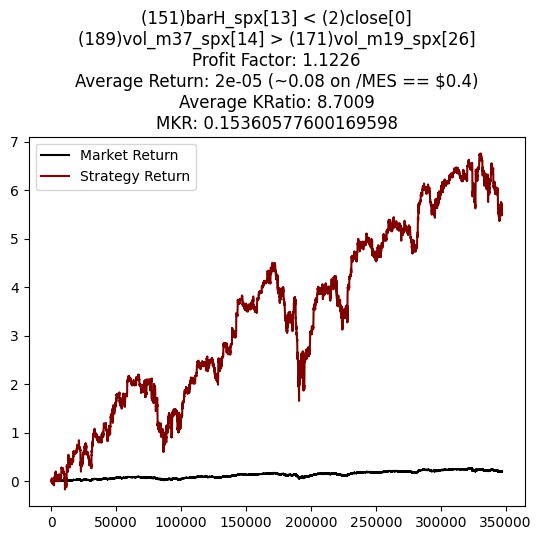

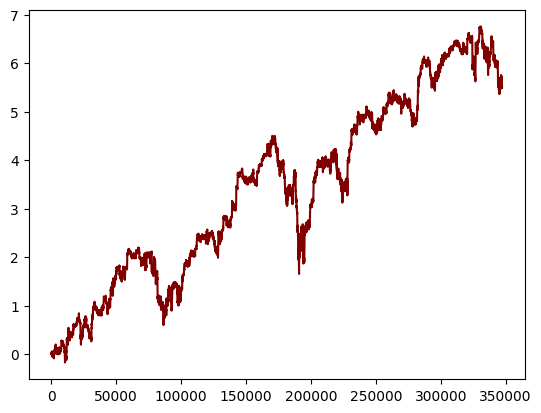

In [45]:
reload(_0)
reload(_2)
_2.show_returns(population[5]._array_returns, arr_close=arr_close, gene_kwargs={"population":population,"criteria":criteria,"fss":fssd})

In [ ]:
import _00_gene as _0
import _05_reproduction as _5


g1 = _0.Gene()
g1.custom(
	fss=fssd,
    acceptable_lag=list(range(30)),
    pattern_vals=[
        (0, 0, 'lt', 0, 0),
        (0, 0, 'lt', 0, 0)
	]
)

